In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

folds=('/kaggle/input/house-plant-species/house_plant_species')

labels=[]
filepaths=[]


for fold in os.listdir(folds):
    fullpath=os.path.join(folds,fold)
    for filename in os.listdir(fullpath):
        full_path=os.path.join(fullpath,filename)
        filepaths.append(full_path)
        labels.append(fold)
        
    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [42]:
df=pd.DataFrame(data={"filepaths":filepaths, "labels":labels})
df   

,filepaths,labels
0,/kaggle/input/house-plant-species/house_plant_...,Orchid
1,/kaggle/input/house-plant-species/house_plant_...,Orchid
2,/kaggle/input/house-plant-species/house_plant_...,Orchid
3,/kaggle/input/house-plant-species/house_plant_...,Orchid
4,/kaggle/input/house-plant-species/house_plant_...,Orchid
...,...,...
14785,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14786,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14787,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14788,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)


In [43]:
df['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       547
Dumb Cane (Dieffenbachia spp.)                541
Chinese evergreen (Aglaonema)                 514
Lilium (Hemerocallis)                         480
Anthurium (Anthurium andraeanum)              455
ZZ Plant (Zamioculcas zamiifolia)             438
Daffodils (Narcissus spp.)                    421
Lily of the valley (Convallaria majalis)      416
Prayer Plant (Maranta leuconeura)             400
Snake plant (Sanseviera)                      396
Peace lily                                    385
Chinese Money Plant (Pilea peperomioides)     382
Money Tree (Pachira aquatica)                 359
Jade plant (Crassula ovata)                   353
Ctenanthe                                     347
Tulip                                         341
Polka Dot Plant (Hypoestes phyllostachya)     341
Tradescantia                                  341
African Violet (Saintpaulia ionantha)         337
Elephant Ear (Alocasia spp.)               

In [44]:
train_df,df_to_split=train_test_split(df,test_size=0.4,random_state=42,stratify=df['labels'])


In [45]:
train_df

,filepaths,labels
3393,/kaggle/input/house-plant-species/house_plant_...,Chinese evergreen (Aglaonema)
3050,/kaggle/input/house-plant-species/house_plant_...,Sago Palm (Cycas revoluta)
1770,/kaggle/input/house-plant-species/house_plant_...,Snake plant (Sanseviera)
1320,/kaggle/input/house-plant-species/house_plant_...,Areca Palm (Dypsis lutescens)
10067,/kaggle/input/house-plant-species/house_plant_...,ZZ Plant (Zamioculcas zamiifolia)
...,...,...
4882,/kaggle/input/house-plant-species/house_plant_...,Parlor Palm (Chamaedorea elegans)
14587,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
13859,/kaggle/input/house-plant-species/house_plant_...,Tradescantia
8533,/kaggle/input/house-plant-species/house_plant_...,Lilium (Hemerocallis)


In [46]:
df_valid,df_test=train_test_split(df_to_split,test_size=0.5,random_state=42,stratify=df_to_split['labels'])
df_valid

,filepaths,labels
11532,/kaggle/input/house-plant-species/house_plant_...,Rubber Plant (Ficus elastica)
3127,/kaggle/input/house-plant-species/house_plant_...,Cast Iron Plant (Aspidistra elatior)
68,/kaggle/input/house-plant-species/house_plant_...,Orchid
7779,/kaggle/input/house-plant-species/house_plant_...,Ponytail Palm (Beaucarnea recurvata)
12690,/kaggle/input/house-plant-species/house_plant_...,Tulip
...,...,...
5587,/kaggle/input/house-plant-species/house_plant_...,Peace lily
14229,/kaggle/input/house-plant-species/house_plant_...,African Violet (Saintpaulia ionantha)
408,/kaggle/input/house-plant-species/house_plant_...,Chrysanthemum
3654,/kaggle/input/house-plant-species/house_plant_...,Chinese evergreen (Aglaonema)


In [47]:
df_test

,filepaths,labels
14184,/kaggle/input/house-plant-species/house_plant_...,African Violet (Saintpaulia ionantha)
13962,/kaggle/input/house-plant-species/house_plant_...,Tradescantia
13375,/kaggle/input/house-plant-species/house_plant_...,Anthurium (Anthurium andraeanum)
11048,/kaggle/input/house-plant-species/house_plant_...,Polka Dot Plant (Hypoestes phyllostachya)
352,/kaggle/input/house-plant-species/house_plant_...,Chrysanthemum
...,...,...
2696,/kaggle/input/house-plant-species/house_plant_...,Hyacinth (Hyacinthus orientalis)
4241,/kaggle/input/house-plant-species/house_plant_...,Daffodils (Narcissus spp.)
2435,/kaggle/input/house-plant-species/house_plant_...,Bird of Paradise (Strelitzia reginae)
14332,/kaggle/input/house-plant-species/house_plant_...,Pothos (Ivy arum)


In [48]:

df_valid['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       110
Dumb Cane (Dieffenbachia spp.)                108
Chinese evergreen (Aglaonema)                 103
Lilium (Hemerocallis)                          96
Anthurium (Anthurium andraeanum)               91
ZZ Plant (Zamioculcas zamiifolia)              87
Daffodils (Narcissus spp.)                     84
Lily of the valley (Convallaria majalis)       83
Prayer Plant (Maranta leuconeura)              80
Snake plant (Sanseviera)                       79
Peace lily                                     77
Chinese Money Plant (Pilea peperomioides)      76
Money Tree (Pachira aquatica)                  72
Jade plant (Crassula ovata)                    71
Ctenanthe                                      70
Tradescantia                                   69
Tulip                                          68
Polka Dot Plant (Hypoestes phyllostachya)      68
African Violet (Saintpaulia ionantha)          68
Calathea                                   

In [49]:
df_test['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       109
Dumb Cane (Dieffenbachia spp.)                108
Chinese evergreen (Aglaonema)                 103
Lilium (Hemerocallis)                          96
Anthurium (Anthurium andraeanum)               91
ZZ Plant (Zamioculcas zamiifolia)              88
Daffodils (Narcissus spp.)                     84
Lily of the valley (Convallaria majalis)       83
Prayer Plant (Maranta leuconeura)              80
Snake plant (Sanseviera)                       79
Chinese Money Plant (Pilea peperomioides)      77
Peace lily                                     77
Money Tree (Pachira aquatica)                  72
Jade plant (Crassula ovata)                    70
Ctenanthe                                      69
Tradescantia                                   68
Tulip                                          68
Polka Dot Plant (Hypoestes phyllostachya)      68
Elephant Ear (Alocasia spp.)                   67
African Violet (Saintpaulia ionantha)      

In [50]:
gen=ImageDataGenerator()

train_gen=gen.flow_from_dataframe(train_df,x_col='filepaths',y_col='labels',target_size=(224,224),
                                 class_mode='categorical',color_mode='rgb',batch_size=16
                                 ,)
valid_gen=gen.flow_from_dataframe(df_valid,x_col='filepaths',y_col='labels',target_size=(224,224),
                                 class_mode='categorical',color_mode='rgb',batch_size=16
                    )
test_gen=gen.flow_from_dataframe(df_test,x_col='filepaths',y_col='labels',target_size=(224,224),
                                class_mode='categorical',color_mode='rgb',batch_size=16
                                )

Found 8767 validated image filenames belonging to 47 classes.
Found 2937 validated image filenames belonging to 47 classes.
Found 2916 validated image filenames belonging to 47 classes.


In [51]:
early_stop=EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

model=Sequential([
    Input((224,224,3)),
    Conv2D(224,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.3),

    Dense(47,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 224)  │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 224)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 128)  │       258,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 373248)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    47,775,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 47)             │         3,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,051,631 (183.30 MB)

 Trainable params: 48,051,631 (183.30 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,callbacks=[early_stop])

Epoch 1/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 254s 457ms/step - accuracy: 0.0265 - loss: 18.0093 - val_accuracy: 0.0364 - val_loss: 3.8469
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 248s 453ms/step - accuracy: 0.0339 - loss: 3.8461 - val_accuracy: 0.0364 - val_loss: 3.8435
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 248s 451ms/step - accuracy: 0.0341 - loss: 3.8418 - val_accuracy: 0.0364 - val_loss: 3.8400
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 256s 467ms/step - accuracy: 0.0391 - loss: 3.8389 - val_accuracy: 0.0364 - val_loss: 3.8367
Epoch 5/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 252s 460ms/step - accuracy: 0.0330 - loss: 3.8356 - val_accuracy: 0.0364 - val_loss: 3.8333
Epoch 6/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 250s 456ms/step - accuracy: 0.0382 - loss: 3.8329 - val_accuracy: 0.0364 - val_loss: 3.8302
Epoch 7/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 249s 455ms/step - accuracy: 0.0380 - loss: 3.8290 - val_accuracy: 0.0364 - val_loss: 3.8270
Epoch 8/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 248s 452ms/step - accuracy: 0.0346 

In [53]:
model.evaluate(train_gen)

548/548 ━━━━━━━━━━━━━━━━━━━━ 182s 332ms/step - accuracy: 0.0376 - loss: 3.8180


[3.817603588104248, 0.036272384226322174]

In [54]:
model.evaluate(valid_gen)

184/184 ━━━━━━━━━━━━━━━━━━━━ 63s 341ms/step - accuracy: 0.0420 - loss: 3.8170


[3.818110704421997, 0.03643173351883888]

In [55]:
model.evaluate(test_gen)

183/183 ━━━━━━━━━━━━━━━━━━━━ 63s 346ms/step - accuracy: 0.0330 - loss: 3.8167


[3.8177549839019775, 0.03635116666555405]

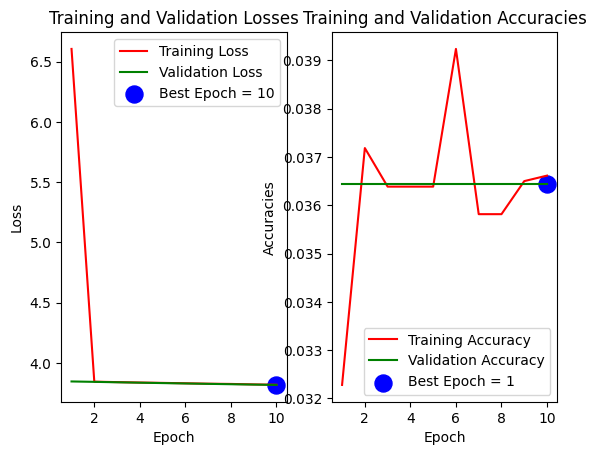

In [64]:
tr_acc=history.history['accuracy']
tr_loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
index_loss=np.argmin(val_loss)
val_lowest=val_loss[index_loss]
index_acc=np.argmax(val_acc)
acc_highest=val_acc[index_acc]

Epochs=[i+1 for i in range(len(tr_acc))]
loss_label=f"Best Epoch = {str(index_loss+1)}"
acc_label=f"Best Epoch = {str(index_acc+1)}"

#plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(Epochs,tr_loss,'r',label='Training Loss')
plt.plot(Epochs,val_loss,'g',label='Validation Loss')
plt.scatter(index_loss+1,val_lowest,s=150,c='blue',label=loss_label)
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs,tr_acc,'r',label='Training Accuracy')
plt.plot(Epochs,val_acc,'g',label='Validation Accuracy')
plt.scatter(index_loss+1,acc_highest,s=150,c='blue',label=acc_label)
plt.title("Training and Validation Accuracies")
plt.xlabel("Epoch")
plt.ylabel('Accuracies')
plt.legend()
plt.show()

